<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/02-FashionMNISTHparams-Corrected/A2_Q2_FashionMNISTHandwritten_Hparams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

train_data, test_data,  = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


# Data Preprocessing

In [ ]:
train_images, train_labels = train_data
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_images, test_labels = test_data
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images,test_images  = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape[1:], test_images.shape[1:]

((28, 28), (28, 28))

In [ ]:
classes =(np.unique(train_labels))
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
classnames = np.array(['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'sneaker', 'bag','ankle-boot'])
classnames

array(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'sneaker', 'bag', 'ankle-boot'], dtype='<U10')

In [ ]:
classes = classes.reshape((-1,1))
classnames = classnames.reshape((-1,1))

In [ ]:
arrayclass = np.hstack((classes,classnames))

In [ ]:
ClassDistribution = pd.DataFrame(arrayclass,columns=['Class','Class-name'])
ClassDistribution

,Class,Class-name
0,0,T-shirt
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,sneaker
8,8,bag
9,9,ankle-boot


In [ ]:
freqs = [list(train_labels).count(x) for x in classes]

In [ ]:
ClassDistribution['Train Freq'] = freqs

In [ ]:
ClassDistribution

,Class,Class-name,Train Freq
0,0,T-shirt,6000
1,1,Trouser,6000
2,2,Pullover,6000
3,3,Dress,6000
4,4,Coat,6000
5,5,Sandal,6000
6,6,Shirt,6000
7,7,sneaker,6000
8,8,bag,6000
9,9,ankle-boot,6000


In [ ]:
test_freqs = [list(test_labels).count(x) for x in classes]

In [ ]:
ClassDistribution['Test Freq'] = freqs

In [ ]:
ClassDistribution

,Class,Class-name,Train Freq,Test Freq
0,0,T-shirt,6000,6000
1,1,Trouser,6000,6000
2,2,Pullover,6000,6000
3,3,Dress,6000,6000
4,4,Coat,6000,6000
5,5,Sandal,6000,6000
6,6,Shirt,6000,6000
7,7,sneaker,6000,6000
8,8,bag,6000,6000
9,9,ankle-boot,6000,6000


In [ ]:
train_images[0].shape

(28, 28)

# HandWritten Model

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4231 - accuracy: 0.8472 - val_loss: 0.2978 - val_accuracy: 0.8895
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2828 - accuracy: 0.8971 - val_loss: 0.2627 - val_accuracy: 0.9021
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2378 - accuracy: 0.9124 - val_loss: 0.2498 - val_accuracy: 0.9094
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2092 - accuracy: 0.9221 - val_loss: 0.2528 - val_accuracy: 0.9121
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1842 - accuracy: 0.9312 - val_loss: 0.2340 - val_accuracy: 0.9190
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1666 - accuracy: 0.9371 - val_loss: 0.2440 - val_accuracy: 0.9184
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1472 - accuracy: 0.9453 - val_loss: 0.2432 - val_accuracy:

313/313 - 1s - loss: 0.3318 - accuracy: 0.9201


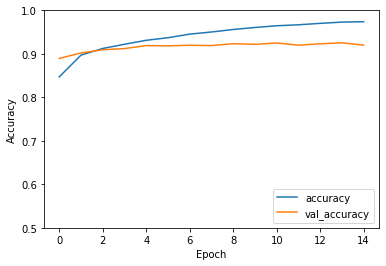

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

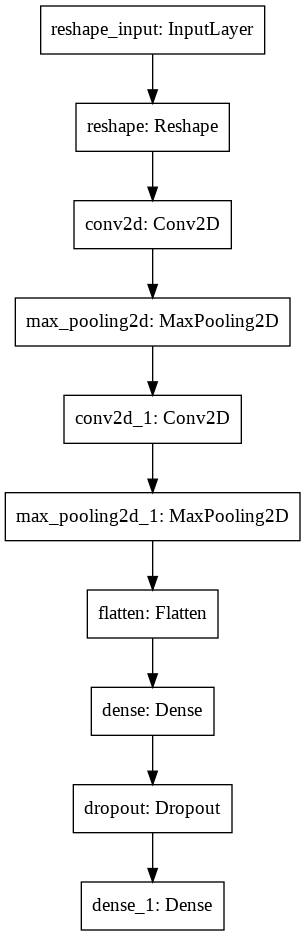

In [ ]:
keras.utils.plot_model(model)

# Loading AutoKeras Model

In [ ]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model('/content/drive/My Drive/Colab Notebooks/AutoKerasFashionMNIST.h5')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
random_translation (RandomTrans (None, 28, 28, 1)    0           normalization[0][0]              
__________________________________________________________________________________________________
random_flip (RandomFlip)        (None, 28, 28, 1)    0           random_translation[0][0]         
_______________________________________________________________________________________

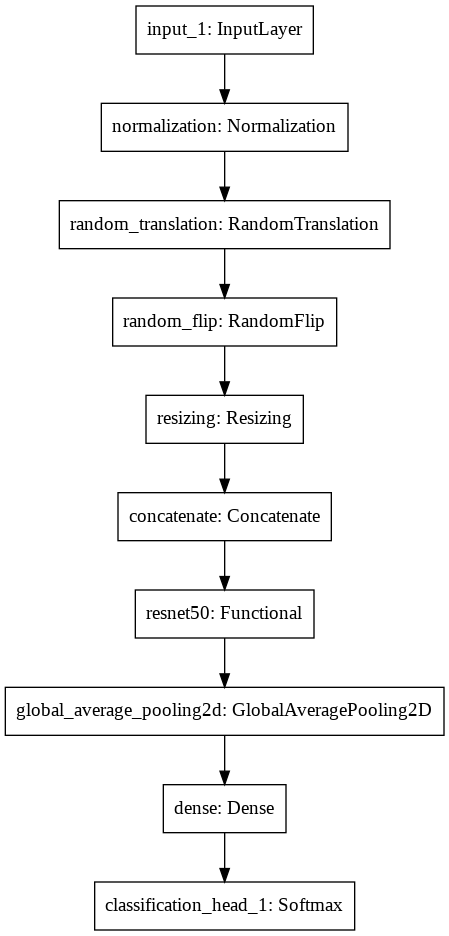

In [ ]:
keras.utils.plot_model(model)

# HParams Tuning

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Optimizer Tuning

In [ ]:
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['rmsprop','sgd','adam', 'nadam','adadelta','adagrad','adamax','ftrl']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=10) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [ ]:
session_num = 0
algodict = {}
for optimizer in HP_OPTIMIZER.domain.values:
    hparams = {
        HP_OPTIMIZER: optimizer,
    }
    run_name = "run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    algodict[optimizer] = run('logs/hparam_opt_tuning/' + run_name, hparams)
    session_num += 1


--- Starting trial: run-0
{'optimizer': 'adadelta'}
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.7427 - accuracy: 0.1050
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 4.2148 - accuracy: 0.2009
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5871 - accuracy: 0.3067
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8440 - accuracy: 0.4141
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6129 - accuracy: 0.4883
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5450 - accuracy: 0.5296
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4755 - accuracy: 0.5722
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4770 - accuracy: 0.5891
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4430 - accuracy: 0.6072
Epoch 10/10
313/313 [=========

In [ ]:
algodict

{'adadelta': 0.7394999861717224,
 'adagrad': 0.23849999904632568,
 'adam': 0.10000000149011612,
 'adamax': 0.23000000417232513,
 'ftrl': 0.10000000149011612,
 'nadam': 0.10000000149011612,
 'rmsprop': 0.10000000149011612,
 'sgd': 0.10000000149011612}

In [ ]:
# algos = ['sgd','rmsprop','nadam','ftrl','adamax','adam','adagrad','adadelta']
# accuracy_results = [93.320,89.470,91.010,10.000,90.780,82.420,95.160,99.760]
# algodict = {algos[i]: accuracy_results[i] for i in range(len(accuracy_results))}
# algodict

{'adadelta': 99.76,
 'adagrad': 95.16,
 'adam': 82.42,
 'adamax': 90.78,
 'ftrl': 10.0,
 'nadam': 91.01,
 'rmsprop': 89.47,
 'sgd': 93.32}

In [ ]:
print(sorted(algodict.items(),key=lambda x: (x[1],x[0])))
plotvar = sorted(algodict.items(),key=lambda x: (x[1],x[0]))

[('adam', 0.10000000149011612), ('ftrl', 0.10000000149011612), ('nadam', 0.10000000149011612), ('rmsprop', 0.10000000149011612), ('sgd', 0.10000000149011612), ('adamax', 0.23000000417232513), ('adagrad', 0.23849999904632568), ('adadelta', 0.7394999861717224)]


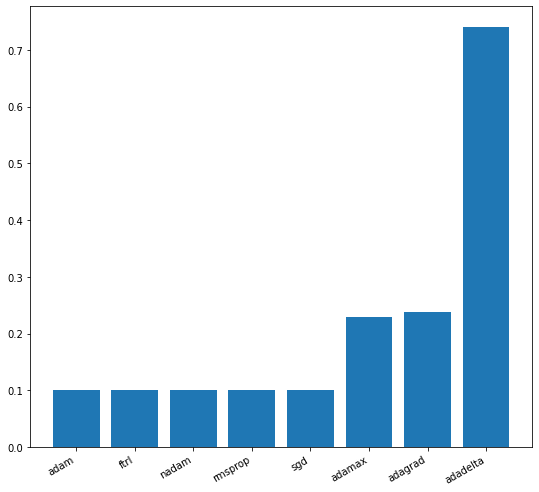

In [ ]:
plt.bar([x[0] for x in plotvar],[x[1] for x in plotvar])
f = plt.gcf()
f.set_size_inches(9,9)
f.autofmt_xdate()

# Activation function Tuning

In [ ]:
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_ACTIVATIONS1 = hp.HParam('activation1',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS2 = hp.HParam('activation2',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS3 = hp.HParam('activation3',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS4 = hp.HParam('activation4',hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_acts').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONS1,HP_ACTIVATIONS2,HP_ACTIVATIONS3,HP_ACTIVATIONS4],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS1], input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS2]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS3]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS4]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adadelta',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=10) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [ ]:
session_num = 0
actdict = {}
for act1 in HP_ACTIVATIONS1.domain.values:
    for act2 in HP_ACTIVATIONS2.domain.values:
        for act3 in HP_ACTIVATIONS3.domain.values:
            for act4 in HP_ACTIVATIONS4.domain.values:            
                hparams = {
                    HP_ACTIVATIONS1: act1,
                    HP_ACTIVATIONS2:act2,
                    HP_ACTIVATIONS3: act3,
                    HP_ACTIVATIONS4: act4
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                actdict[(act1,act2,act3,act4)] = run('logs/hparam_tuning_acts/' + run_name, hparams)
                session_num += 1


--- Starting trial: run-0
{'activation1': 'elu', 'activation2': 'elu', 'activation3': 'elu', 'activation4': 'elu'}
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 6.4802 - accuracy: 0.1170
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5942 - accuracy: 0.1483
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9755 - accuracy: 0.1958
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2830 - accuracy: 0.2647
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9387 - accuracy: 0.3431
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7708 - accuracy: 0.4272
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6584 - accuracy: 0.4803
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5616 - accuracy: 0.5211
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step -

In [ ]:
 print(f"Number of Sessions: {session_num}")

Number of Sessions: 81


In [ ]:
actdict

{('elu', 'elu', 'elu', 'elu'): 0.713100016117096,
 ('elu', 'elu', 'elu', 'relu'): 0.724399983882904,
 ('elu', 'elu', 'elu', 'selu'): 0.7314000129699707,
 ('elu', 'elu', 'relu', 'elu'): 0.7307999730110168,
 ('elu', 'elu', 'relu', 'relu'): 0.6881999969482422,
 ('elu', 'elu', 'relu', 'selu'): 0.7468000054359436,
 ('elu', 'elu', 'selu', 'elu'): 0.7199000120162964,
 ('elu', 'elu', 'selu', 'relu'): 0.6887000203132629,
 ('elu', 'elu', 'selu', 'selu'): 0.6962000131607056,
 ('elu', 'relu', 'elu', 'elu'): 0.7269999980926514,
 ('elu', 'relu', 'elu', 'relu'): 0.6841999888420105,
 ('elu', 'relu', 'elu', 'selu'): 0.7430999875068665,
 ('elu', 'relu', 'relu', 'elu'): 0.6930999755859375,
 ('elu', 'relu', 'relu', 'relu'): 0.6814000010490417,
 ('elu', 'relu', 'relu', 'selu'): 0.7207000255584717,
 ('elu', 'relu', 'selu', 'elu'): 0.7272999882698059,
 ('elu', 'relu', 'selu', 'relu'): 0.6488999724388123,
 ('elu', 'relu', 'selu', 'selu'): 0.6876000165939331,
 ('elu', 'selu', 'elu', 'elu'): 0.7372000217437744,

In [ ]:
print(sorted(actdict.items(),key=lambda x: (x[1],x[0])))

[(('selu', 'relu', 'selu', 'relu'), 0.19850000739097595), (('relu', 'relu', 'elu', 'relu'), 0.6132000088691711), (('selu', 'elu', 'selu', 'selu'), 0.6328999996185303), (('relu', 'relu', 'selu', 'relu'), 0.6449999809265137), (('elu', 'relu', 'selu', 'relu'), 0.6488999724388123), (('relu', 'elu', 'elu', 'relu'), 0.6507999897003174), (('relu', 'relu', 'relu', 'relu'), 0.6607999801635742), (('relu', 'elu', 'selu', 'relu'), 0.6711999773979187), (('selu', 'relu', 'elu', 'relu'), 0.671999990940094), (('selu', 'relu', 'relu', 'relu'), 0.6740999817848206), (('selu', 'elu', 'relu', 'relu'), 0.6808000206947327), (('selu', 'elu', 'elu', 'relu'), 0.6811000108718872), (('elu', 'relu', 'relu', 'relu'), 0.6814000010490417), (('relu', 'selu', 'relu', 'relu'), 0.6819999814033508), (('relu', 'selu', 'selu', 'relu'), 0.6829000115394592), (('elu', 'relu', 'elu', 'relu'), 0.6841999888420105), (('relu', 'elu', 'elu', 'elu'), 0.6843000054359436), (('selu', 'selu', 'elu', 'selu'), 0.6843000054359436), (('selu'

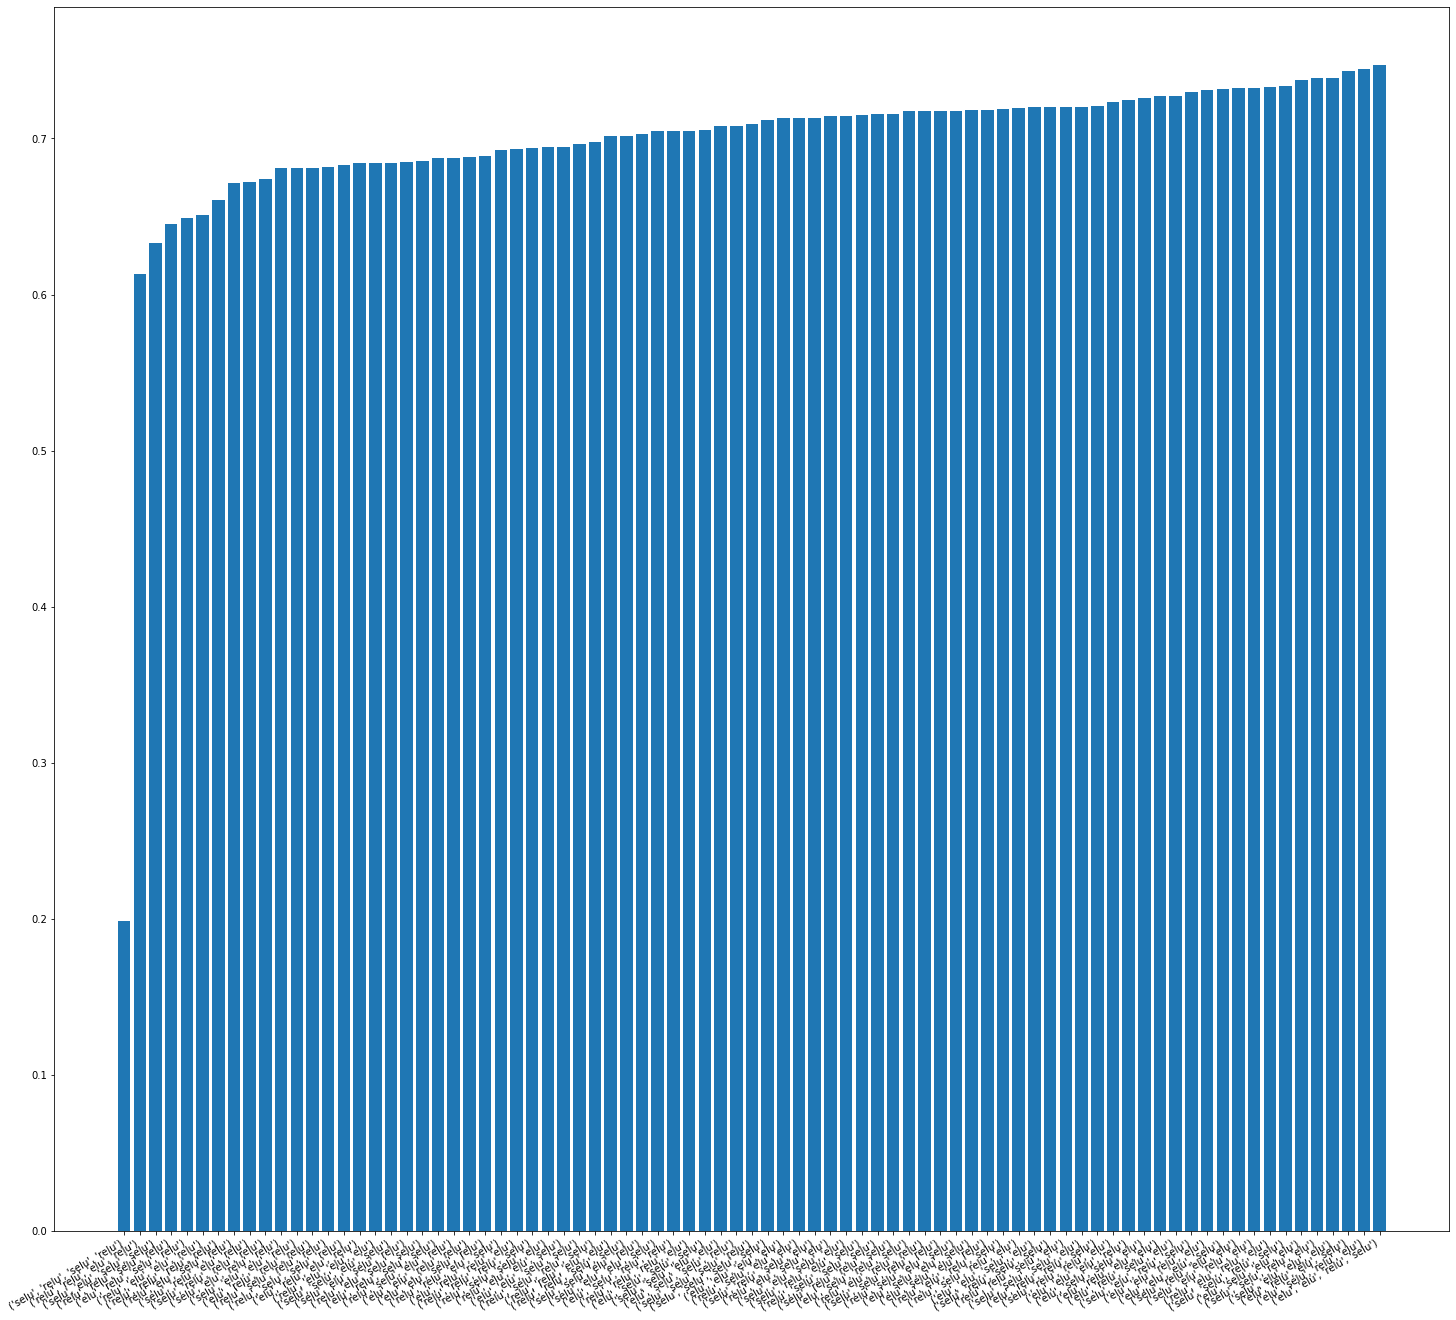

In [ ]:
plotvar2 = sorted(actdict.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar2],[x[1] for x in plotvar2])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

# Number of Units Training

In [47]:
HP_FILTER1 = hp.HParam('filters1', hp.Discrete([32, 64, 128]))
HP_FILTER2 = hp.HParam('filters2', hp.Discrete([32, 64, 128]))
HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([256, 512, 1024]))
HP_NUM_UNITS2 = hp.HParam('num_units2', hp.Discrete([256, 512, 1024]))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_units').as_default():
  hp.hparams_config(
    hparams=[HP_FILTER1,HP_FILTER2,HP_NUM_UNITS1,HP_NUM_UNITS2],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [54]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(hparams[HP_FILTER1], kernel_size=(3,3), padding='same', activation='elu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Conv2D(hparams[HP_FILTER2], kernel_size=(3,3), padding='same', activation='elu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Flatten())
    model.add(layers.Dense(hparams[HP_NUM_UNITS1], activation='relu'))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(hparams[HP_NUM_UNITS2], activation='selu'))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adadelta',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=10) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [55]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [56]:
session_num = 0
unitdict = {}
for unit1 in HP_FILTER1.domain.values:
    for unit2 in HP_FILTER2.domain.values:
        for unit3 in HP_NUM_UNITS1.domain.values:
            for unit4 in HP_NUM_UNITS2.domain.values:            
                hparams = {
                    HP_FILTER1: unit1,
                    HP_FILTER2: unit2,
                    HP_NUM_UNITS1: unit3,
                    HP_NUM_UNITS2: unit4
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                unitdict[(unit1,unit2,unit3,unit4)] = run('logs/hparam_tuning_acts/' + run_name, hparams)
                session_num += 1


--- Starting trial: run-0
{'filters1': 32, 'filters2': 32, 'num_units1': 256, 'num_units2': 256}
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 8.4721 - accuracy: 0.1095
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 7.7940 - accuracy: 0.1227
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 7.0680 - accuracy: 0.1394
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 6.3598 - accuracy: 0.1521
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.7034 - accuracy: 0.1708
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.0253 - accuracy: 0.1870
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 4.4912 - accuracy: 0.2053
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 4.0106 - accuracy: 0.2213
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 3.5986 - ac

In [58]:
print(f'Number of Sessions: {session_num}')

Number of Sessions: 81


In [57]:
unitdict

{(32, 32, 256, 256): 0.5318999886512756,
 (32, 32, 256, 512): 0.689300000667572,
 (32, 32, 256, 1024): 0.6783999800682068,
 (32, 32, 512, 256): 0.6549000144004822,
 (32, 32, 512, 512): 0.6992999911308289,
 (32, 32, 512, 1024): 0.6996999979019165,
 (32, 32, 1024, 256): 0.7203999757766724,
 (32, 32, 1024, 512): 0.7386999726295471,
 (32, 32, 1024, 1024): 0.6137999892234802,
 (32, 64, 256, 256): 0.6783999800682068,
 (32, 64, 256, 512): 0.7001000046730042,
 (32, 64, 256, 1024): 0.7282999753952026,
 (32, 64, 512, 256): 0.7142000198364258,
 (32, 64, 512, 512): 0.7132999897003174,
 (32, 64, 512, 1024): 0.7401000261306763,
 (32, 64, 1024, 256): 0.47839999198913574,
 (32, 64, 1024, 512): 0.7426000237464905,
 (32, 64, 1024, 1024): 0.7558000087738037,
 (32, 128, 256, 256): 0.7305999994277954,
 (32, 128, 256, 512): 0.7335000038146973,
 (32, 128, 256, 1024): 0.7462000250816345,
 (32, 128, 512, 256): 0.7355999946594238,
 (32, 128, 512, 512): 0.7591999769210815,
 (32, 128, 512, 1024): 0.76090002059936

In [60]:
print(sorted(unitdict.items(),key=lambda x: (x[1],x[0])))

[((128, 32, 1024, 256), 0.4034000039100647), ((32, 64, 1024, 256), 0.47839999198913574), ((64, 32, 256, 256), 0.5169000029563904), ((32, 32, 256, 256), 0.5318999886512756), ((64, 64, 512, 1024), 0.6057999730110168), ((64, 32, 256, 512), 0.6086000204086304), ((32, 32, 1024, 1024), 0.6137999892234802), ((128, 32, 256, 512), 0.6507999897003174), ((128, 32, 256, 256), 0.6517000198364258), ((32, 32, 512, 256), 0.6549000144004822), ((64, 32, 256, 1024), 0.6639999747276306), ((64, 64, 256, 256), 0.6665999889373779), ((64, 32, 512, 256), 0.6690999865531921), ((64, 32, 512, 512), 0.6772000193595886), ((32, 32, 256, 1024), 0.6783999800682068), ((32, 64, 256, 256), 0.6783999800682068), ((128, 32, 512, 256), 0.6843000054359436), ((32, 32, 256, 512), 0.689300000667572), ((128, 64, 256, 256), 0.6952000260353088), ((32, 32, 512, 512), 0.6992999911308289), ((32, 32, 512, 1024), 0.6996999979019165), ((32, 64, 256, 512), 0.7001000046730042), ((128, 64, 256, 512), 0.7102000117301941), ((64, 32, 1024, 256

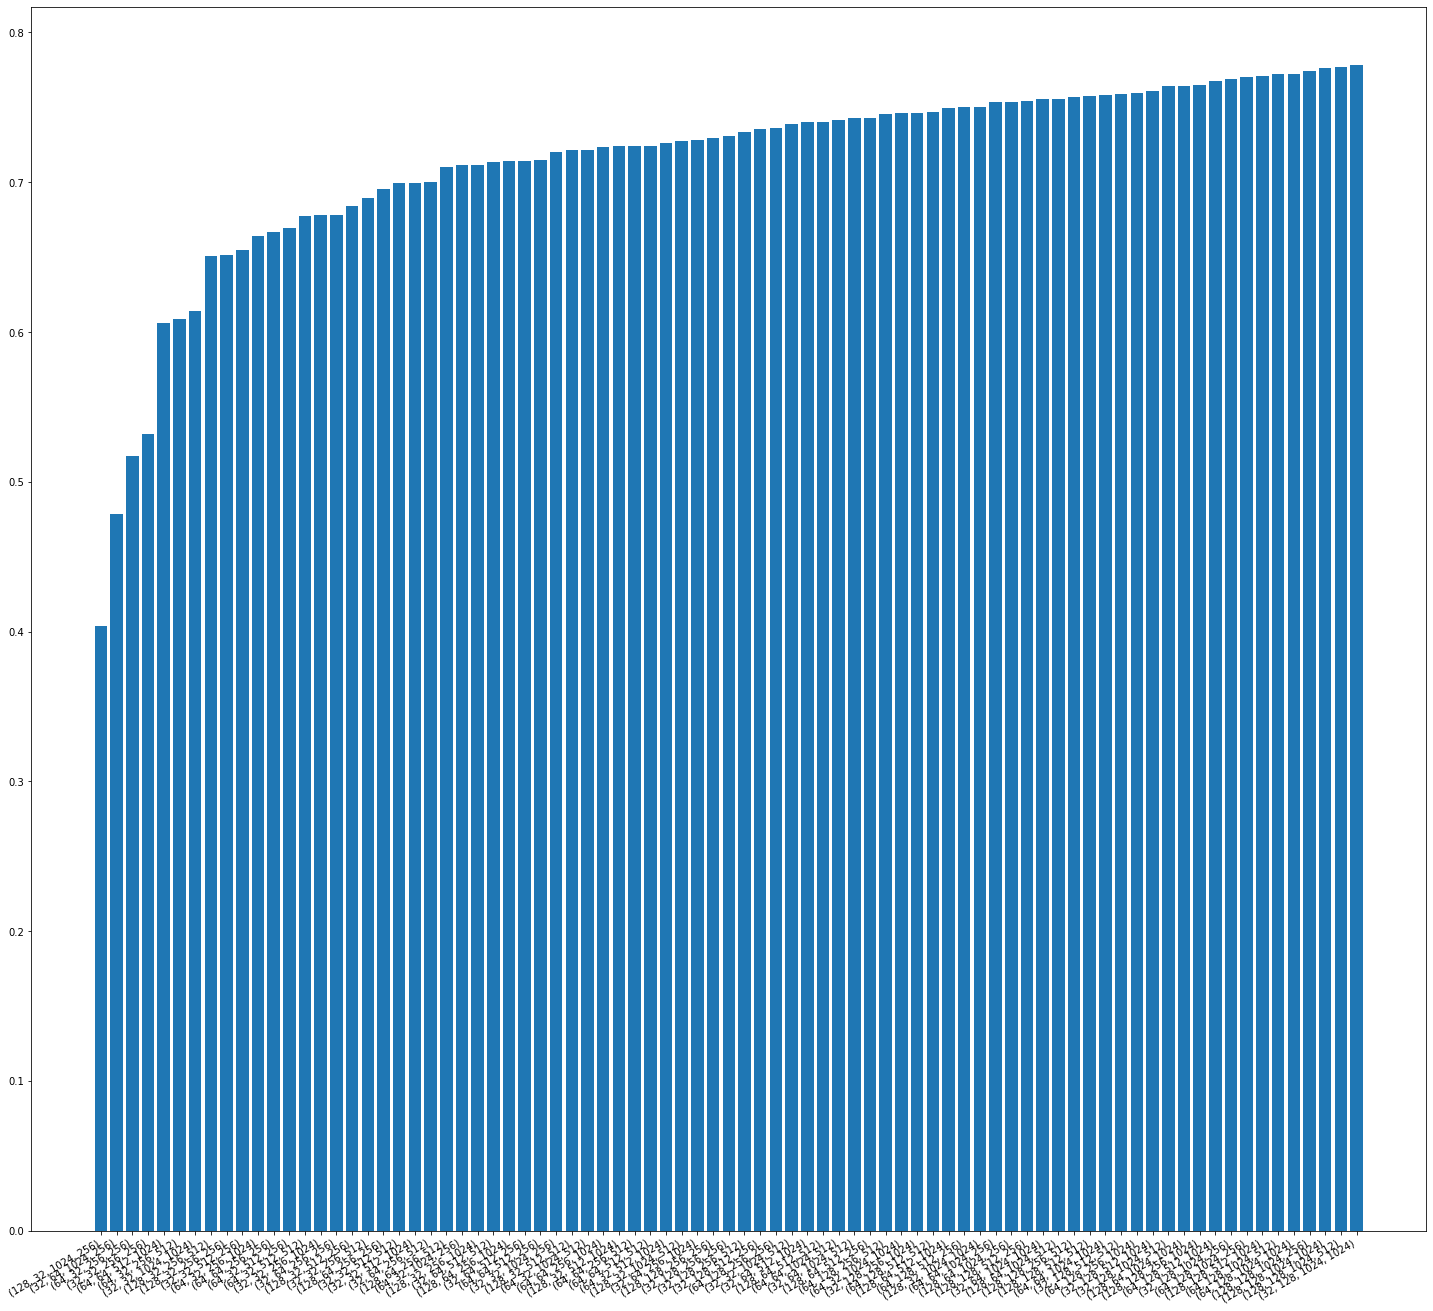

In [62]:
plotvar3 = sorted(unitdict.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar3],[x[1] for x in plotvar3])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

# END